In [24]:
import pandas as pd
import numpy as np

data = pd.read_csv('sklearn-benchmark5-data-edited.tsv.gz', sep='\t').fillna('')
print(data.head())
data['accuracy'] = data['accuracy'].apply(lambda x: round(x, 3))
print('loaded ',data['dataset'].unique().shape[0],'datasets and ', data['classifier'].unique().shape[0],'classifiers')
# subset data to classifiers used in PennAI
# pennai_classifiers = ['LogisticRegression', 'RandomForestClassifier', 'SVC', 
#                       'KNeighborsClassifier', 'DecisionTreeClassifier', 'GradientBoostingClassifier']
# mask = np.array([c in pennai_classifiers for c in data['classifier'].values])
# data = data.loc[mask,:]
print('datasets (',len(data['dataset'].unique()),')')
print('classifiers (',len(data['classifier'].unique()),'):',data['classifier'].unique())
for ml, df_g in data.groupby('classifier'):
    print('parameters for ',ml,'(',len(df_g['parameters'].unique()),'):',df_g['parameters'].unique()[:5])
    


   Unnamed: 0                                            dataset  \
0           0  GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...   
1           1  GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...   
2           2  GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...   
3           3  GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...   
4           4  GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...   

           classifier                            parameters  accuracy  \
0  AdaBoostClassifier    learning_rate=0.01,n_estimators=10  0.479375   
1  AdaBoostClassifier   learning_rate=0.01,n_estimators=100  0.476875   
2  AdaBoostClassifier  learning_rate=0.01,n_estimators=1000  0.488125   
3  AdaBoostClassifier    learning_rate=0.01,n_estimators=50  0.483750   
4  AdaBoostClassifier   learning_rate=0.01,n_estimators=500  0.495625   

    macrof1  bal_accuracy  
0  0.470857      0.479375  
1  0.476497      0.476875  
2  0.488115      0.488125  
3  0.483652      0.483750  
4  0.495609 

# what are the gradient boosting parameters?

In [2]:
gbc_params = data[data.classifier=='GradientBoostingClassifier']['parameters'].unique()
losses = []
lrs=[]
nests=[]
maxdepths=[]
maxfeatures=[]
for gbcp in gbc_params:
    n_est = int(gbcp.split('n_estimators=')[-1].split(',')[0])
    max_depth = gbcp.split('max_depth=')[-1].split(',')[0]
    max_feat = gbcp.split('max_features=')[-1].split(',')[0]
    loss = gbcp.split('loss=')[-1].split(',')[0] 
    lr = gbcp.split('learning_rate=')[-1].split(',')[0] 
    if n_est not in nests:
        nests.append(n_est)
    if max_depth not in maxdepths:
        maxdepths.append(max_depth)
    if max_feat not in maxfeatures:
        maxfeatures.append(max_feat)
    if loss not in losses:
        losses.append(loss)
    if lr not in lrs:
        lrs.append(lr)
#     print(gbcp)
print ('nests: ', nests)
print ('max_depths: ', maxdepths) 
print ('max_features: ', maxfeatures) 
print ('losses: ', losses) 
print ('learning_rates: ', lrs) 
print('total combos:',len(gbc_params))

nests:  [10, 100, 1000, 50, 500]
max_depths:  ['1', '10', '2', '20', '3', '4', '5', '50', 'None']
max_features:  ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', 'log2', 'sqrt', 'None']
losses:  ['deviance', 'exponential']
learning_rates:  ['0.01', '0.1', '0.5', '1.0', '10.0', '100.0', '50.0']
total combos: 6301


# what are the random forest parameters?

In [3]:
gbc_params = data[data.classifier=='RandomForestClassifier']['parameters'].unique()
criterions = []
mwfls=[]
nests=[]
maxfeatures=[]
for gbcp in gbc_params:
    n_est = int(gbcp.split('n_estimators=')[-1].split(',')[0])
    max_feat = gbcp.split('max_features=')[-1].split(',')[0]
    criterion = gbcp.split('criterion=')[-1].split(',')[0] 
    mwfl = gbcp.split('min_weight_fraction_leaf=')[-1].split(',')[0] 
    if n_est not in nests:
        nests.append(n_est)
    if max_feat not in maxfeatures:
        maxfeatures.append(max_feat)
    if criterion not in criterions:
        criterions.append(criterion)
    if mwfl not in mwfls:
        mwfls.append(mwfl)
#     print(gbcp)
print('RandomForest parameters:')
print ('nests: ', nests)
print ('max_features: ', maxfeatures) 
print ('criterions: ', criterions) 
print ('min_weight_fraction_leafs: ', mwfls) 
print('total:',len(nests)*len(maxfeatures)*len(criterions)*len(mwfls),len(gbc_params))

RandomForest parameters:
nests:  [10, 100, 1000, 50, 500]
max_features:  ['0.1', '0.25', '0.5', '0.75', 'None', 'log2', 'sqrt']
criterions:  ['entropy', 'gini']
min_weight_fraction_leafs:  ['0.0', '0.05', '0.1', '0.15000000000000002', '0.2', '0.25', '0.30000000000000004', '0.35000000000000003', '0.4', '0.45', '0.5']
total: 770 770


# what are the extra trees parameters?

In [4]:
gbc_params = data[data.classifier=='ExtraTreesClassifier']['parameters'].unique()
criterions = []
mwfls=[]
nests=[]
maxfeatures=[]
for gbcp in gbc_params:
    n_est = int(gbcp.split('n_estimators=')[-1].split(',')[0])
    max_feat = gbcp.split('max_features=')[-1].split(',')[0]
    criterion = gbcp.split('criterion=')[-1].split(',')[0] 
    mwfl = gbcp.split('min_weight_fraction_leaf=')[-1].split(',')[0] 
    if n_est not in nests:
        nests.append(n_est)
    if max_feat not in maxfeatures:
        maxfeatures.append(max_feat)
    if criterion not in criterions:
        criterions.append(criterion)
    if mwfl not in mwfls:
        mwfls.append(mwfl)
#     print(gbcp)
print('ExtraTrees parameters:')
print ('nests: ', nests)
print ('max_features: ', maxfeatures) 
print ('criterions: ', criterions) 
print ('learning_rates: ', mwfls) 
print('total:',len(nests)*len(maxfeatures)*len(criterions)*len(mwfls),len(gbc_params))

ExtraTrees parameters:
nests:  [10, 100, 1000, 50, 500]
max_features:  ['0.1', '0.25', '0.5', '0.75', 'None', 'log2', 'sqrt']
criterions:  ['entropy', 'gini']
learning_rates:  ['0.0', '0.05', '0.1', '0.15000000000000002', '0.2', '0.25', '0.30000000000000004', '0.35000000000000003', '0.4', '0.45', '0.5']
total: 770 770


# reduce GBC

In [25]:
# n_est = ['n_estimators='+str(n) for n in [100,500,1000]]
# max_depth = ['max_depth='+str(d) for d in [5,10,'None']]
learning_rates = ['learning_rate='+str(d) for d in ['0.01', '0.1', '0.5', '1.0', '10.0']]
max_features = ['max_features='+str(f) for f in ['sqrt','log2','None']]
loss = ['loss='+str(f) for f in ['deviance']]

gbc = data['classifier']=='GradientBoostingClassifier'
mask = [False for g in gbc]
for n in learning_rates:
    mask = mask | (gbc & np.array([n in p for p in data['parameters'].values]))
mask = (mask | ~gbc)
data = data.loc[mask,:]

gbc = data['classifier']=='GradientBoostingClassifier'
mask = [False for g in gbc]
for n in max_features:
    mask = mask | (gbc & np.array([n in p for p in data['parameters'].values]))
mask = (mask | ~gbc)
data = data.loc[mask,:]

gbc = data['classifier']=='GradientBoostingClassifier'
mask = [False for g in gbc]
for n in loss:
    mask = mask | (gbc & np.array([n in p for p in data['parameters'].values]))
mask = (mask | ~gbc)
data = data.loc[mask,:]
print('new # parameters:',data[data.classifier=='GradientBoostingClassifier']['parameters'].nunique())

new # parameters: 451


# reduce RF

In [6]:
# # reduce Random Forest n_estimators

# rfc = data['classifier']=='RandomForestClassifier'
# mask = [False for g in rfc]
# for n in n_est:
#     mask = mask | (rfc & np.array([n in p for p in data['parameters'].values]))
# mask = (mask | ~rfc)
# data = data.loc[mask,:]

# rfc = data['classifier']=='RandomForestClassifier'
# mask = [False for g in rfc]
# for n in max_features:
#     mask = mask | (rfc & np.array([n in p for p in data['parameters'].values]))
# mask = (mask | ~rfc)
# data = data.loc[mask,:]

# data.groupby('classifier').count()

# Reduce extra trees

In [7]:

# rfc = data['classifier']=='ExtraTreesClassifier'
# mask = [False for g in rfc]
# for n in n_est:
#     mask = mask | (rfc & np.array([n in p for p in data['parameters'].values]))
# mask = (mask | ~rfc)
# data = data.loc[mask,:]

# rfc = data['classifier']=='ExtraTreesClassifier'
# mask = [False for g in rfc]
# for n in max_features:
#     mask = mask | (rfc & np.array([n in p for p in data['parameters'].values]))
# mask = (mask | ~rfc)
# data = data.loc[mask,:]

# data.groupby('classifier').count()

# Reduce SGD (it has 28000, let's bring it down to 6000)

In [8]:
sgd_params = data[data.classifier=='SGDClassifier'].parameters.unique()
# sgd_params_dict = [{k:v for k,v in [tuple(ps.split('=')) for ps in filter(None, p.split(','))]} for p in sgd_params]
alphas = []
eta0s = []
losses = []
l1ratios = []
lrs= []
for sg in sgd_params:
    a = float(sg.split('alpha=')[-1].split(',')[0])
    eta0 =float(sg.split('eta0=')[-1].split(',')[0]) 
    l1ratio =float(sg.split('l1_ratio=')[-1].split(',')[0]) 
    loss = sg.split('loss=')[-1].split(',')[0] 
    lr = sg.split('learning_rate=')[-1].split(',')[0] 
    if a not in alphas:
        alphas.append(a)
    if eta0 not in eta0s:
        eta0s.append(eta0)
    if loss not in losses:
        losses.append(loss)
    if lr not in lrs:
        lrs.append(lr)
    if l1ratio not in l1ratios:
        l1ratios.append(l1ratio)
#     print(sg)
print ('alphas: ', alphas)
print ('eta0s: ', eta0s) 
print ('losses: ', losses) 
print ('l1ratios: ', l1ratios) 
print ('learning_rates: ', lrs) 
########
#######

eta0 = ['eta0='+str(n) for n in [0.0,0.1,1.0]]
l1_ratio = ['l1_ratio='+str(d) for d in [0.0, 0.25, 0.5, 0.75, 1.0]]
# reduce SGD 
sgd = data['classifier']=='SGDClassifier'
mask = [False for g in sgd]
for n in eta0:
    mask = mask | (sgd & np.array([n in p for p in data['parameters'].values]))
mask = (mask | ~sgd)
data = data.loc[mask,:]

sgd = data['classifier']=='SGDClassifier'
mask = [False for g in sgd]
for n in l1_ratio:
    mask = mask | (sgd & np.array([n in p for p in data['parameters'].values]))
mask = (mask | ~sgd)
data = data.loc[mask,:]


data.groupby('classifier')['parameters'].nunique()

alphas:  [0.0001, 0.001, 0.01, 1e-05, 1e-06]
eta0s:  [0.01, 0.1, 0.5, 1.0, 10.0, 100.0, 50.0, 0.0]
losses:  ['hinge', 'log', 'modified_huber', 'perceptron', 'squared_hinge']
l1ratios:  [0.0, 0.1, 0.15, 0.25, 0.5, 0.75, 0.9, 1.0]
learning_rates:  ['constant', 'invscaling', 'optimal']


classifier
AdaBoostClassifier               35
BernoulliNB                     140
DecisionTreeClassifier          154
ExtraTreesClassifier            770
GaussianNB                        1
GradientBoostingClassifier      451
KNeighborsClassifier             54
LogisticRegression              240
MultinomialNB                    20
PassiveAggressiveClassifier      44
RandomForestClassifier          770
SGDClassifier                  6000
SVC                            1239
Name: parameters, dtype: int64

In [9]:
sgd_params

array(['loss=hinge,penalty=elasticnet,alpha=0.0001,learning_rate=constant,fit_intercept=False,l1_ratio=0.0,eta0=0.01,power_t=0.5',
       'loss=hinge,penalty=elasticnet,alpha=0.0001,learning_rate=constant,fit_intercept=False,l1_ratio=0.0,eta0=0.1,power_t=0.5',
       'loss=hinge,penalty=elasticnet,alpha=0.0001,learning_rate=constant,fit_intercept=False,l1_ratio=0.0,eta0=0.5,power_t=0.5',
       ...,
       'loss=squared_hinge,penalty=l2,alpha=1e-06,learning_rate=invscaling,fit_intercept=True,l1_ratio=0.15,eta0=50.0,power_t=10.0',
       'loss=squared_hinge,penalty=l2,alpha=1e-06,learning_rate=invscaling,fit_intercept=True,l1_ratio=0.15,eta0=50.0,power_t=100.0',
       'loss=squared_hinge,penalty=l2,alpha=1e-06,learning_rate=invscaling,fit_intercept=True,l1_ratio=0.15,eta0=50.0,power_t=50.0'],
      dtype=object)

# convert parameters to sklearn style dictionaries

In [10]:
def fix_params(p):
#     print(p)
    fixed_params = {k:v for k,v in [tuple(ps.split('=')) for ps in filter(None, p.split(','))]}
    for k,v in fixed_params.items():
        try:
            fixed_params[k] = int(v)
        except ValueError:
            try:     
                fixed_params[k] = float(v)
            except ValueError:
                if fixed_params[k] == 'None':
                    fixed_params[k] = None 
                else:
                    fixed_params[k] = str(v).lower()
                pass
    return fixed_params
# datanew = data.copy()
data= data.copy()
data['parameters'] = data['parameters'].apply(lambda x: fix_params(x))

data.head()

,Unnamed: 0,dataset,classifier,parameters,accuracy,macrof1,bal_accuracy
0,0,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,AdaBoostClassifier,"{'learning_rate': 0.01, 'n_estimators': 10}",0.479,0.470857,0.479375
1,1,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,AdaBoostClassifier,"{'learning_rate': 0.01, 'n_estimators': 100}",0.477,0.476497,0.476875
2,2,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,AdaBoostClassifier,"{'learning_rate': 0.01, 'n_estimators': 1000}",0.488,0.488115,0.488125
3,3,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,AdaBoostClassifier,"{'learning_rate': 0.01, 'n_estimators': 50}",0.484,0.483652,0.483750
4,4,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,AdaBoostClassifier,"{'learning_rate': 0.01, 'n_estimators': 500}",0.496,0.495609,0.495625


# print preview of ML parameters

In [11]:
for ml, df_g in data.groupby('classifier'):
    print('example parameters for ',ml,'(',len(df_g['parameters'].apply(str).unique()),'):',
           df_g['parameters'].apply(str).unique()[0])

example parameters for  AdaBoostClassifier ( 35 ): {'learning_rate': 0.01, 'n_estimators': 10}
example parameters for  BernoulliNB ( 140 ): {'alpha': 0.0, 'fit_prior': 'false', 'binarize': 0.0}
example parameters for  DecisionTreeClassifier ( 154 ): {'min_weight_fraction_leaf': 0.0, 'max_features': 0.1, 'criterion': 'entropy'}
example parameters for  ExtraTreesClassifier ( 770 ): {'n_estimators': 10, 'min_weight_fraction_leaf': 0.0, 'max_features': 0.1, 'criterion': 'entropy'}
example parameters for  GaussianNB ( 1 ): {}
example parameters for  GradientBoostingClassifier ( 451 ): {'loss': 'deviance', 'learning_rate': 0.01, 'n_estimators': 10, 'max_depth': 1, 'max_features': 'log2'}
example parameters for  KNeighborsClassifier ( 54 ): {'n_neighbors': 1, 'weights': 'distance'}
example parameters for  LogisticRegression ( 240 ): {'C': 0.5, 'penalty': 'l1', 'fit_intercept': 'false', 'dual': 'false'}
example parameters for  MultinomialNB ( 20 ): {'alpha': 0.0, 'fit_prior': 'false'}
example 

# filter big datasets
why? you ask. because many big datasets failed to produce results for many algorithm-parameter combinations.

getting ncombos...
lowest combo datasets:
ncombos sorted: [('poker', 0.010401497815685458), ('mnist', 16.777615976700645), ('kddcup', 17.74495527355939), ('sleep', 33.62804243811109), ('fars', 34.272935302683585), ('connect-4', 36.22841689203245), ('shuttle', 37.008529228208864), ('krkopt', 38.443935926773456), ('letter', 48.55419180361972), ('adult', 55.70002080299563), ('optdigits', 57.01060952777199), ('mfeat-factors', 57.31225296442688), ('pendigits', 57.55148741418764), ('mfeat-pixel', 58.4356147285209), ('texture', 62.460994383191185), ('GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_EDM-1_1', 69.0971499895985), ('coil2000', 70.18930726024547), ('dna', 72.07197836488454), ('satimage', 75.84772207197837), ('mfeat-fourier', 76.28458498023716), ('clean2', 77.62637819846057), ('Hill_Valley_without_noise', 87.22696068233826), ('Hill_Valley_with_noise', 87.39338464738923), ('ring', 88.10068649885584), ('mfeat-zernike', 88.16309548574995), ('magic', 88.25670896609111), ('waveform-40', 88.2

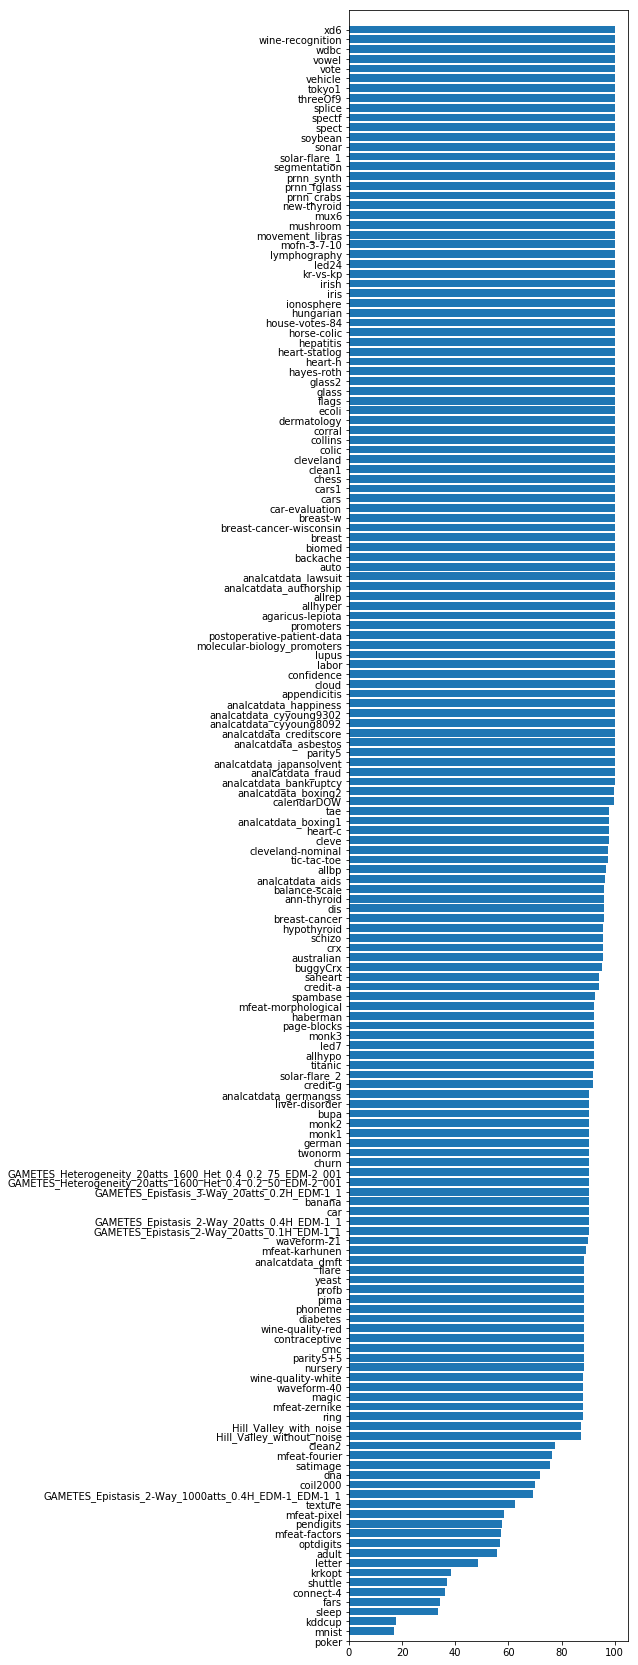

In [12]:
data.loc[:, 'algorithm-parameters'] = (                                             
                                       data['classifier'].values + '|' +                     
                                       data['parameters'].apply(
                                           lambda x: str(hash(frozenset(x.items())))) 
                                      )
import matplotlib.pyplot as plt
%matplotlib inline
print('getting ncombos...')
ncombos = {}
total_ncombos = data['algorithm-parameters'].nunique()
for d, dfg in data.groupby('dataset'):
    ncombos[d] = dfg['algorithm-parameters'].nunique()
print('lowest combo datasets:')
ncombos_sorted = sorted(ncombos.items(), key=lambda kv: kv[1])
print('ncombos sorted:',[(n[0],n[1]/total_ncombos*100) for n in ncombos_sorted])
plt.figure(figsize=(5,30))
plt.barh(np.arange(len(ncombos_sorted)),[nc[1]/total_ncombos*100 for nc in ncombos_sorted])
plt.gca().set_yticks(np.arange(len(ncombos_sorted)))
plt.gca().set_yticklabels([nc[0] for nc in ncombos_sorted])
plt.ylim(0,len(ncombos_sorted)+1)
plt.show()

In [13]:
# remove datasets that have less than 85% of the parameter combinatiosn
big_data = [n[0] for n in ncombos_sorted if n[1]/total_ncombos < 0.85]
print('big data:',big_data)
print('filtering...')
data = data.loc[~data.dataset.isin(big_data)]
print('done. now there are',data.dataset.nunique(),'datasets with',
      data['algorithm-parameters'].nunique(),'unique algorithm-parameter combinations')

big data: ['poker', 'mnist', 'kddcup', 'sleep', 'fars', 'connect-4', 'shuttle', 'krkopt', 'letter', 'adult', 'optdigits', 'mfeat-factors', 'pendigits', 'mfeat-pixel', 'texture', 'GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_EDM-1_1', 'coil2000', 'dna', 'satimage', 'mfeat-fourier', 'clean2']
filtering...
done. now there are 145 datasets with 9614 unique algorithm-parameter combinations


# how many winners of each algorithm are there? (winning = < 1% away from best score)

/home/bill/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

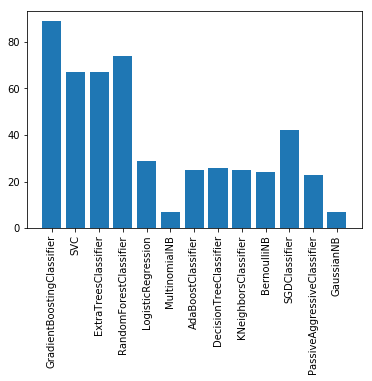

In [14]:
winner = {}
winner_datasets = {}
import numpy as np
for d, df in data.groupby('dataset'):
    df['bal_accuracy'] = df['bal_accuracy'].apply(pd.to_numeric)
    best_score = df['bal_accuracy'].max()
    for clf, dfg in df.groupby('classifier'):
        wins = np.any((best_score - dfg.bal_accuracy)/best_score <= 0.01)
        if wins:
            if clf in winner:
                winner[clf] += 1
                winner_datasets[clf].append(d)
            else:
                winner[clf] = 1
                winner_datasets[clf] = [d]
import matplotlib.pyplot as plt
%matplotlib inline
# print(winner)
# print(winner_datasets)
plt.bar(list(winner.keys()),list(winner.values()))
plt.xticks(rotation=90)               

# remove datasets where GBC is the only winner
EDIT: i'm no longer convinced this is necessary with the expanded results (i.e. including extra trees etc)

In [15]:
import itertools
other_winners = [d for d in [da for k,da in winner_datasets.items() if k != 'GradientBoostingClassifier' ]]
other_winners = list(itertools.chain.from_iterable(other_winners))
#print(other_winners) 
only_gbc = [d for d in winner_datasets['GradientBoostingClassifier'] 
            if d not in other_winners]
print(only_gbc)
len(only_gbc)

['GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1', 'GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_50_EDM-2_001', 'GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_75_EDM-2_001', 'analcatdata_aids', 'bupa', 'cleve', 'cloud', 'credit-g', 'flags', 'glass2', 'solar-flare_1']


11

In [16]:
data = data[~data.dataset.isin(only_gbc)]
print('# datasets left:',data.dataset.nunique())

# datasets left: 134


# remove alg-params that don't cover all datasets

In [17]:
# data.loc[:, 'algorithm-parameters'] = (                                             
#                                        data['classifier'].values + '|' +                     
#                                        data['parameters'].apply(
#                                            lambda x: str(hash(frozenset(x.items())))) 
#                                       )
all_datasets = data['dataset'].unique()
nd = len(all_datasets)
algp_toremove = []
from tqdm import tqdm
for algp, group in tqdm(data.groupby('algorithm-parameters')):
    if (group['dataset'].nunique()<nd):
#         print(algp, '\n\t is missing results for', 
#               [d for d in all_datasets if d not in group['dataset'].unique()])
#         print('removing',algp)
        algp_toremove.append(algp)
print('constructing mask...')   
mask = np.array([ap not in algp_toremove for ap in data['algorithm-parameters'].values])
print('removing',np.sum(~mask),'results')
data = data.loc[mask,:]
print('new size:',len(data))

print(len(data['algorithm-parameters'].unique()),'unique algorithm-parameters')
data.drop('algorithm-parameters',axis=1,inplace=True)

# check data 
import pandas as pd
ndatasets = data['dataset'].nunique()
sgd_data = data[data.classifier=='SGDClassifier']
for ml, dfg in data.groupby('classifier'):
    dfg['parameters'] = dfg['parameters'].apply(lambda x: str(frozenset(x.items())))
    for ml_p, dfgp in dfg.groupby('parameters'):
        if (dfgp.dataset.nunique()!=ndatasets):
            print(ml_p,'only has',dfgp.dataset.nunique(),'dataset results')
            assert(dfgp.dataset.nunique()==ndatasets)

100%|██████████| 9614/9614 [00:03<00:00, 3091.05it/s]


constructing mask...
removing 266493 results
new size: 1015720
7330 unique algorithm-parameters


/home/bill/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# calculate rankings for each result

In [18]:
data['bal_accuracy'] = data['bal_accuracy'].apply(pd.to_numeric)
# data['norm_score'] = data.groupby('dataset')['bal_accuracy'].transform(
#                                                                 lambda x: (x - x.min()) / (x.max() - x.min()))
data['round_score'] = data['bal_accuracy'].apply(lambda x: round(x,2))
data['ranking'] = data.groupby('dataset')['round_score'].rank(ascending=False,method='dense')            

In [19]:
for ml, df_g in data.groupby('classifier'):
    print('example parameters for ',ml,'(',len(df_g['parameters'].apply(str).unique()),'):',
           df_g['parameters'].apply(str).unique()[0])

example parameters for  AdaBoostClassifier ( 35 ): {'learning_rate': 0.01, 'n_estimators': 10}
example parameters for  BernoulliNB ( 140 ): {'alpha': 0.0, 'fit_prior': 'false', 'binarize': 0.0}
example parameters for  DecisionTreeClassifier ( 154 ): {'min_weight_fraction_leaf': 0.0, 'max_features': 0.1, 'criterion': 'entropy'}
example parameters for  ExtraTreesClassifier ( 770 ): {'n_estimators': 10, 'min_weight_fraction_leaf': 0.0, 'max_features': 0.1, 'criterion': 'entropy'}
example parameters for  GaussianNB ( 1 ): {}
example parameters for  GradientBoostingClassifier ( 451 ): {'loss': 'deviance', 'learning_rate': 0.01, 'n_estimators': 10, 'max_depth': 1, 'max_features': 'log2'}
example parameters for  KNeighborsClassifier ( 50 ): {'n_neighbors': 1, 'weights': 'distance'}
example parameters for  LogisticRegression ( 240 ): {'C': 0.5, 'penalty': 'l1', 'fit_intercept': 'false', 'dual': 'false'}
example parameters for  MultinomialNB ( 20 ): {'alpha': 0.0, 'fit_prior': 'false'}
example 

In [20]:
print(len(data.dataset.unique()),'unique datasets')

134 unique datasets


In [1]:
winner = {}
winner_datasets = {}
import numpy as np
for d, df in data.groupby('dataset'):
    df['bal_accuracy'] = df['bal_accuracy'].apply(pd.to_numeric)
    best_score = df['bal_accuracy'].max()
    for clf, dfg in df.groupby('classifier'):
        wins = np.any((best_score - dfg.bal_accuracy)/best_score <= 0.01)
        if wins:
            if clf in winner:
                winner[clf] += 1
                winner_datasets[clf].append(d)
            else:
                winner[clf] = 1
                winner_datasets[clf] = [d]
import matplotlib.pyplot as plt
%matplotlib inline
# print(winner)
# print(winner_datasets)
plt.barh(list(winner.keys()),list(winner.values()))
plt.xticks(rotation=90)               

NameError: name 'data' is not defined

# write modified data to file

In [22]:
data.rename(columns={'classifier':'algorithm'},inplace=True)
data.to_csv('sklearn-benchmark5-data-mock_experiment.tsv.gz',compression='gzip',index=False,sep='\t')

In [23]:
# check data for SGD
import pandas as pd
# data = pd.read_csv('sklearn-benchmark5-data-mock_experiment.tsv.gz',compression='gzip',sep='\t')
ndatasets = data['dataset'].nunique()
sgd_data = data[data.algorithm=='SGDClassifier']
for sgd_p, dfg in sgd_data.groupby('parameters'):
    print(sgd_p,':',dfg.dataset.nunique())
    assert(dfg.dataset.nunique()==ndatasets)

{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'constant', 'fit_intercept': 'false', 'l1_ratio': 0.0, 'eta0': 0.01, 'power_t': 0.5} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'constant', 'fit_intercept': 'false', 'l1_ratio': 0.0, 'eta0': 0.1, 'power_t': 0.5} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'constant', 'fit_intercept': 'false', 'l1_ratio': 0.0, 'eta0': 1.0, 'power_t': 0.5} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'constant', 'fit_intercept': 'false', 'l1_ratio': 0.25, 'eta0': 0.01, 'power_t': 0.5} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'constant', 'fit_intercept': 'false', 'l1_ratio': 0.25, 'eta0': 0.1, 'power_t': 0.5} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'constant', 'fit_intercept': 'false', 'l1_ratio': 0.25, 'eta0': 1.0, 'power_t': 0.5}

{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.5, 'eta0': 0.01, 'power_t': 1.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.5, 'eta0': 0.01, 'power_t': 10.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.5, 'eta0': 0.01, 'power_t': 100.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.5, 'eta0': 0.01, 'power_t': 50.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.5, 'eta0': 0.1, 'power_t': 0.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.5, 'eta0': 0.1, 'power

{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 0.1} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 0.5} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 1.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 10.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 100.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 

{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 0.1, 'power_t': 10.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 0.1, 'power_t': 100.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 0.1, 'power_t': 50.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 1.0, 'power_t': 0.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 1.0, 'power_t': 0.1} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 1.0, 'power_t':

{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 1.0, 'power_t': 1.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 1.0, 'power_t': 10.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 1.0, 'power_t': 100.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 1.0, 'power_t': 50.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 0.01, 'power_t': 0.0} : 134
{'loss': 'hinge', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 0.01, 'power_t':

{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 1.0, 'power_t': 10.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 1.0, 'power_t': 100.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 1.0, 'power_t': 50.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 0.01, 'power_t': 0.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 0.01, 'power_t': 0.1} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 0.01, 'power_t': 0.5} 

{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.5, 'eta0': 0.1, 'power_t': 1.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.5, 'eta0': 0.1, 'power_t': 10.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.5, 'eta0': 0.1, 'power_t': 100.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.5, 'eta0': 0.1, 'power_t': 50.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.5, 'eta0': 1.0, 'power_t': 0.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.5, 'eta0': 1.0, 'power_t': 0.1} : 134
{'loss

{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 1.0, 'power_t': 100.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 1.0, 'power_t': 50.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 0.01, 'power_t': 0.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 0.01, 'power_t': 0.1} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 0.01, 'power_t': 0.5} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 0.01, 'power_t': 1.0} : 134
{'loss'

{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 0.1, 'power_t': 100.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 0.1, 'power_t': 50.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 1.0, 'power_t': 0.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 1.0, 'power_t': 0.1} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 1.0, 'power_t': 0.5} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.0, 'eta0': 1.0, 'power_t': 1.0} : 134
{'loss'

{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 0.01, 'power_t': 0.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 0.01, 'power_t': 0.1} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 0.01, 'power_t': 0.5} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 0.01, 'power_t': 1.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 0.01, 'power_t': 10.0} : 134
{'loss': 'log', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 0.01, 'power_t': 10

{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 0.01, 'power_t': 1.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 0.01, 'power_t': 10.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 0.01, 'power_t': 100.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 0.01, 'power_t': 50.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 1.0, 'eta0': 0.1, 'power_t': 0.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'f

{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.5, 'eta0': 0.1, 'power_t': 10.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.5, 'eta0': 0.1, 'power_t': 100.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.5, 'eta0': 0.1, 'power_t': 50.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.5, 'eta0': 1.0, 'power_t': 0.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.5, 'eta0': 1.0, 'power_t': 0.1} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_interce

{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 0.01, 'power_t': 0.1} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 0.01, 'power_t': 0.5} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 0.01, 'power_t': 1.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 0.01, 'power_t': 10.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.75, 'eta0': 0.01, 'power_t': 100.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_inte

{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.25, 'eta0': 0.1, 'power_t': 0.5} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.25, 'eta0': 0.1, 'power_t': 1.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.25, 'eta0': 0.1, 'power_t': 10.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.25, 'eta0': 0.1, 'power_t': 100.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.25, 'eta0': 0.1, 'power_t': 50.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_in

{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.0, 'eta0': 1.0, 'power_t': 10.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.0, 'eta0': 1.0, 'power_t': 100.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.0, 'eta0': 1.0, 'power_t': 50.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.25, 'eta0': 0.01, 'power_t': 0.0} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'false', 'l1_ratio': 0.25, 'eta0': 0.01, 'power_t': 0.1} : 134
{'loss': 'modified_huber', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_int

{'loss': 'perceptron', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.25, 'eta0': 1.0, 'power_t': 10.0} : 134
{'loss': 'perceptron', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.25, 'eta0': 1.0, 'power_t': 100.0} : 134
{'loss': 'perceptron', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.25, 'eta0': 1.0, 'power_t': 50.0} : 134
{'loss': 'perceptron', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.5, 'eta0': 0.01, 'power_t': 0.0} : 134
{'loss': 'perceptron', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.5, 'eta0': 0.01, 'power_t': 0.1} : 134
{'loss': 'perceptron', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio':

{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 0.5} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 1.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 10.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 100.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 50.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.0001, 'learning_rate': 'invscaling', 'fit_interce

{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 1.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 10.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 100.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.75, 'eta0': 1.0, 'power_t': 50.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 1.0, 'eta0': 0.01, 'power_t': 0.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.001, 'learning_rate': 'invscaling', 'fit_intercept': '

{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.5, 'eta0': 1.0, 'power_t': 100.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.5, 'eta0': 1.0, 'power_t': 50.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.75, 'eta0': 0.01, 'power_t': 0.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.75, 'eta0': 0.01, 'power_t': 0.1} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.75, 'eta0': 0.01, 'power_t': 0.5} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 0.01, 'learning_rate': 'invscaling', 'fit_intercept': 'true',

{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.25, 'eta0': 0.1, 'power_t': 1.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.25, 'eta0': 0.1, 'power_t': 10.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.25, 'eta0': 0.1, 'power_t': 100.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.25, 'eta0': 0.1, 'power_t': 50.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.25, 'eta0': 1.0, 'power_t': 0.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 1e-05, 'learning_rate': 'invscaling', 'fit_intercept': '

{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.25, 'eta0': 0.01, 'power_t': 100.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.25, 'eta0': 0.01, 'power_t': 50.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.25, 'eta0': 0.1, 'power_t': 0.0} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.25, 'eta0': 0.1, 'power_t': 0.1} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 'true', 'l1_ratio': 0.25, 'eta0': 0.1, 'power_t': 0.5} : 134
{'loss': 'squared_hinge', 'penalty': 'elasticnet', 'alpha': 1e-06, 'learning_rate': 'invscaling', 'fit_intercept': 